In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

### LEER ARCHIVO Y REVISAR DESCRIPCION

In [2]:

data=pd.read_csv('input/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
nr, nc = data.shape
print (f"There are {nr} rows and {nc} columns")

There are 768 rows and 9 columns


In [4]:
data.size
print (f"There are {data.size} atributes in data")

There are 6912 atributes in data


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
num_columns = data._get_numeric_data().columns

In [7]:
num_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.select_dtypes(include=['object']).columns.tolist()

[]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe().round(2).style.background_gradient()

In [11]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

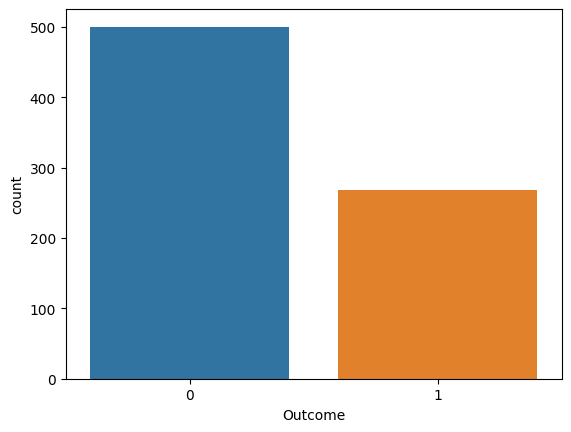

In [12]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['Outcome'])
plt.show()

In [13]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<b> Detect minimum and maximun values for columns </b>

In [14]:
for col in data.columns:
    print("The minimum value fore the columns {} is {} and the maximun value is {}"
          .format(col, data[col].min(), data[col].max()))


The minimum value fore the columns Pregnancies is 0 and the maximun value is 17
The minimum value fore the columns Glucose is 0 and the maximun value is 199
The minimum value fore the columns BloodPressure is 0 and the maximun value is 122
The minimum value fore the columns SkinThickness is 0 and the maximun value is 99
The minimum value fore the columns Insulin is 0 and the maximun value is 846
The minimum value fore the columns BMI is 0.0 and the maximun value is 67.1
The minimum value fore the columns DiabetesPedigreeFunction is 0.078 and the maximun value is 2.42
The minimum value fore the columns Age is 21 and the maximun value is 81
The minimum value fore the columns Outcome is 0 and the maximun value is 1


 <ul>
    <li>  Presion sanguinea no puede ser 0</li>
    <li>  Glucosa no puede ser 0</li>
    <li> SkinThickness no puede ser 0</li>
    <li> Insulin no puede ser 0</li>
    <li> BMI no puede ser 0 </li>
    
  </ul>
  <b>consulta <a> https://fmdiabetes.org/automonitoreo-niveles-glucosa/ </a><b/>

In [19]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [21]:
diabetes_dataset = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]

In [22]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median()) # 
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### detect  outliers in data

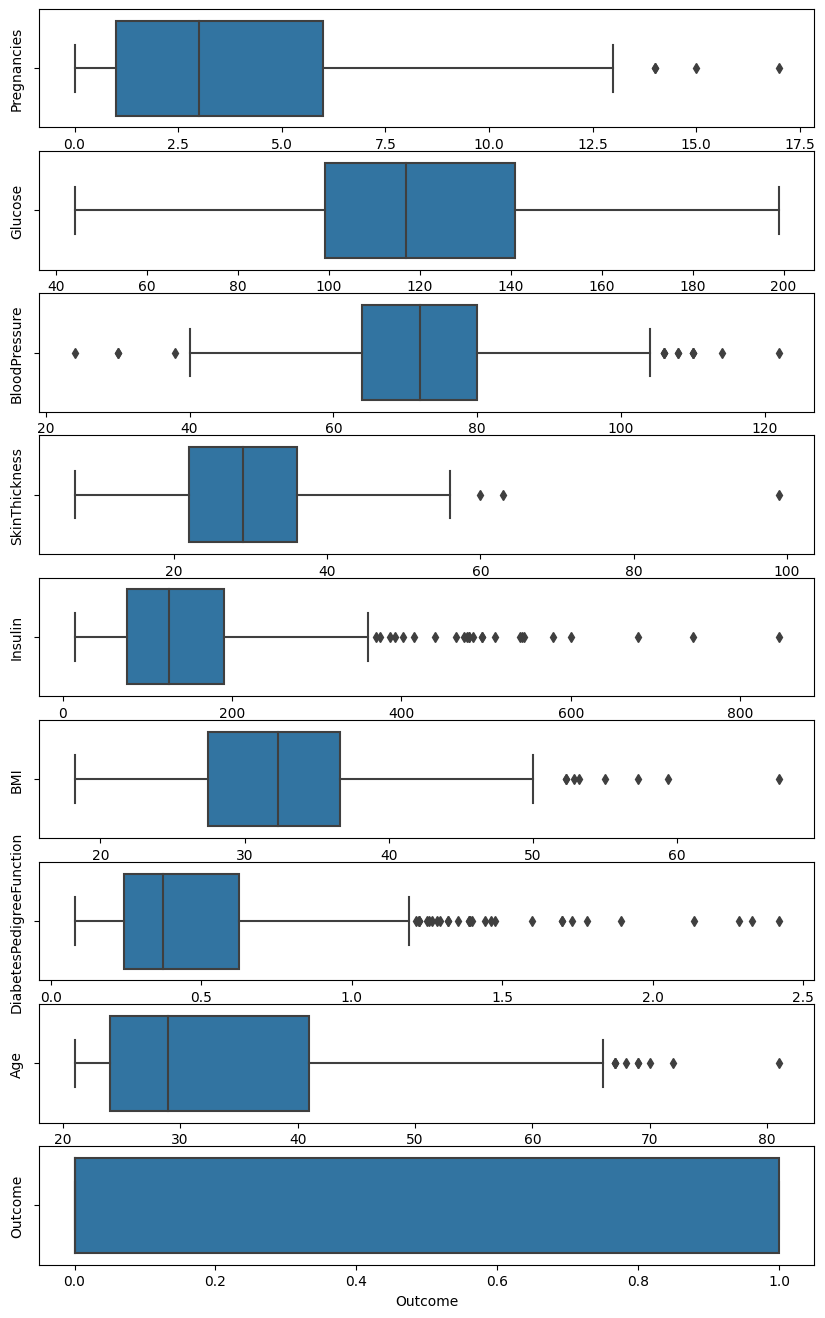

In [25]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_columns,1):
     plt.subplot(11,1,i)
     sns.boxplot(diabetes_dataset[col])
     plt.ylabel(col)
plt.show()

<AxesSubplot:>

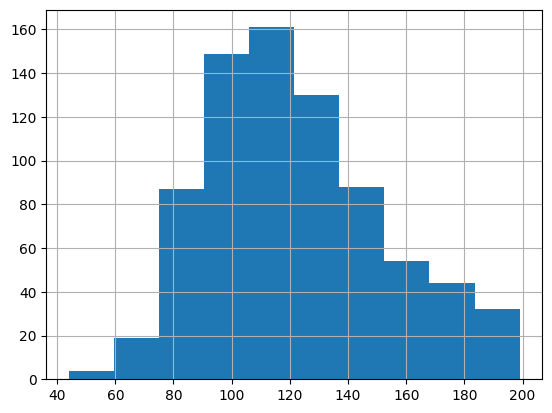

In [26]:
data['Glucose'].hist()

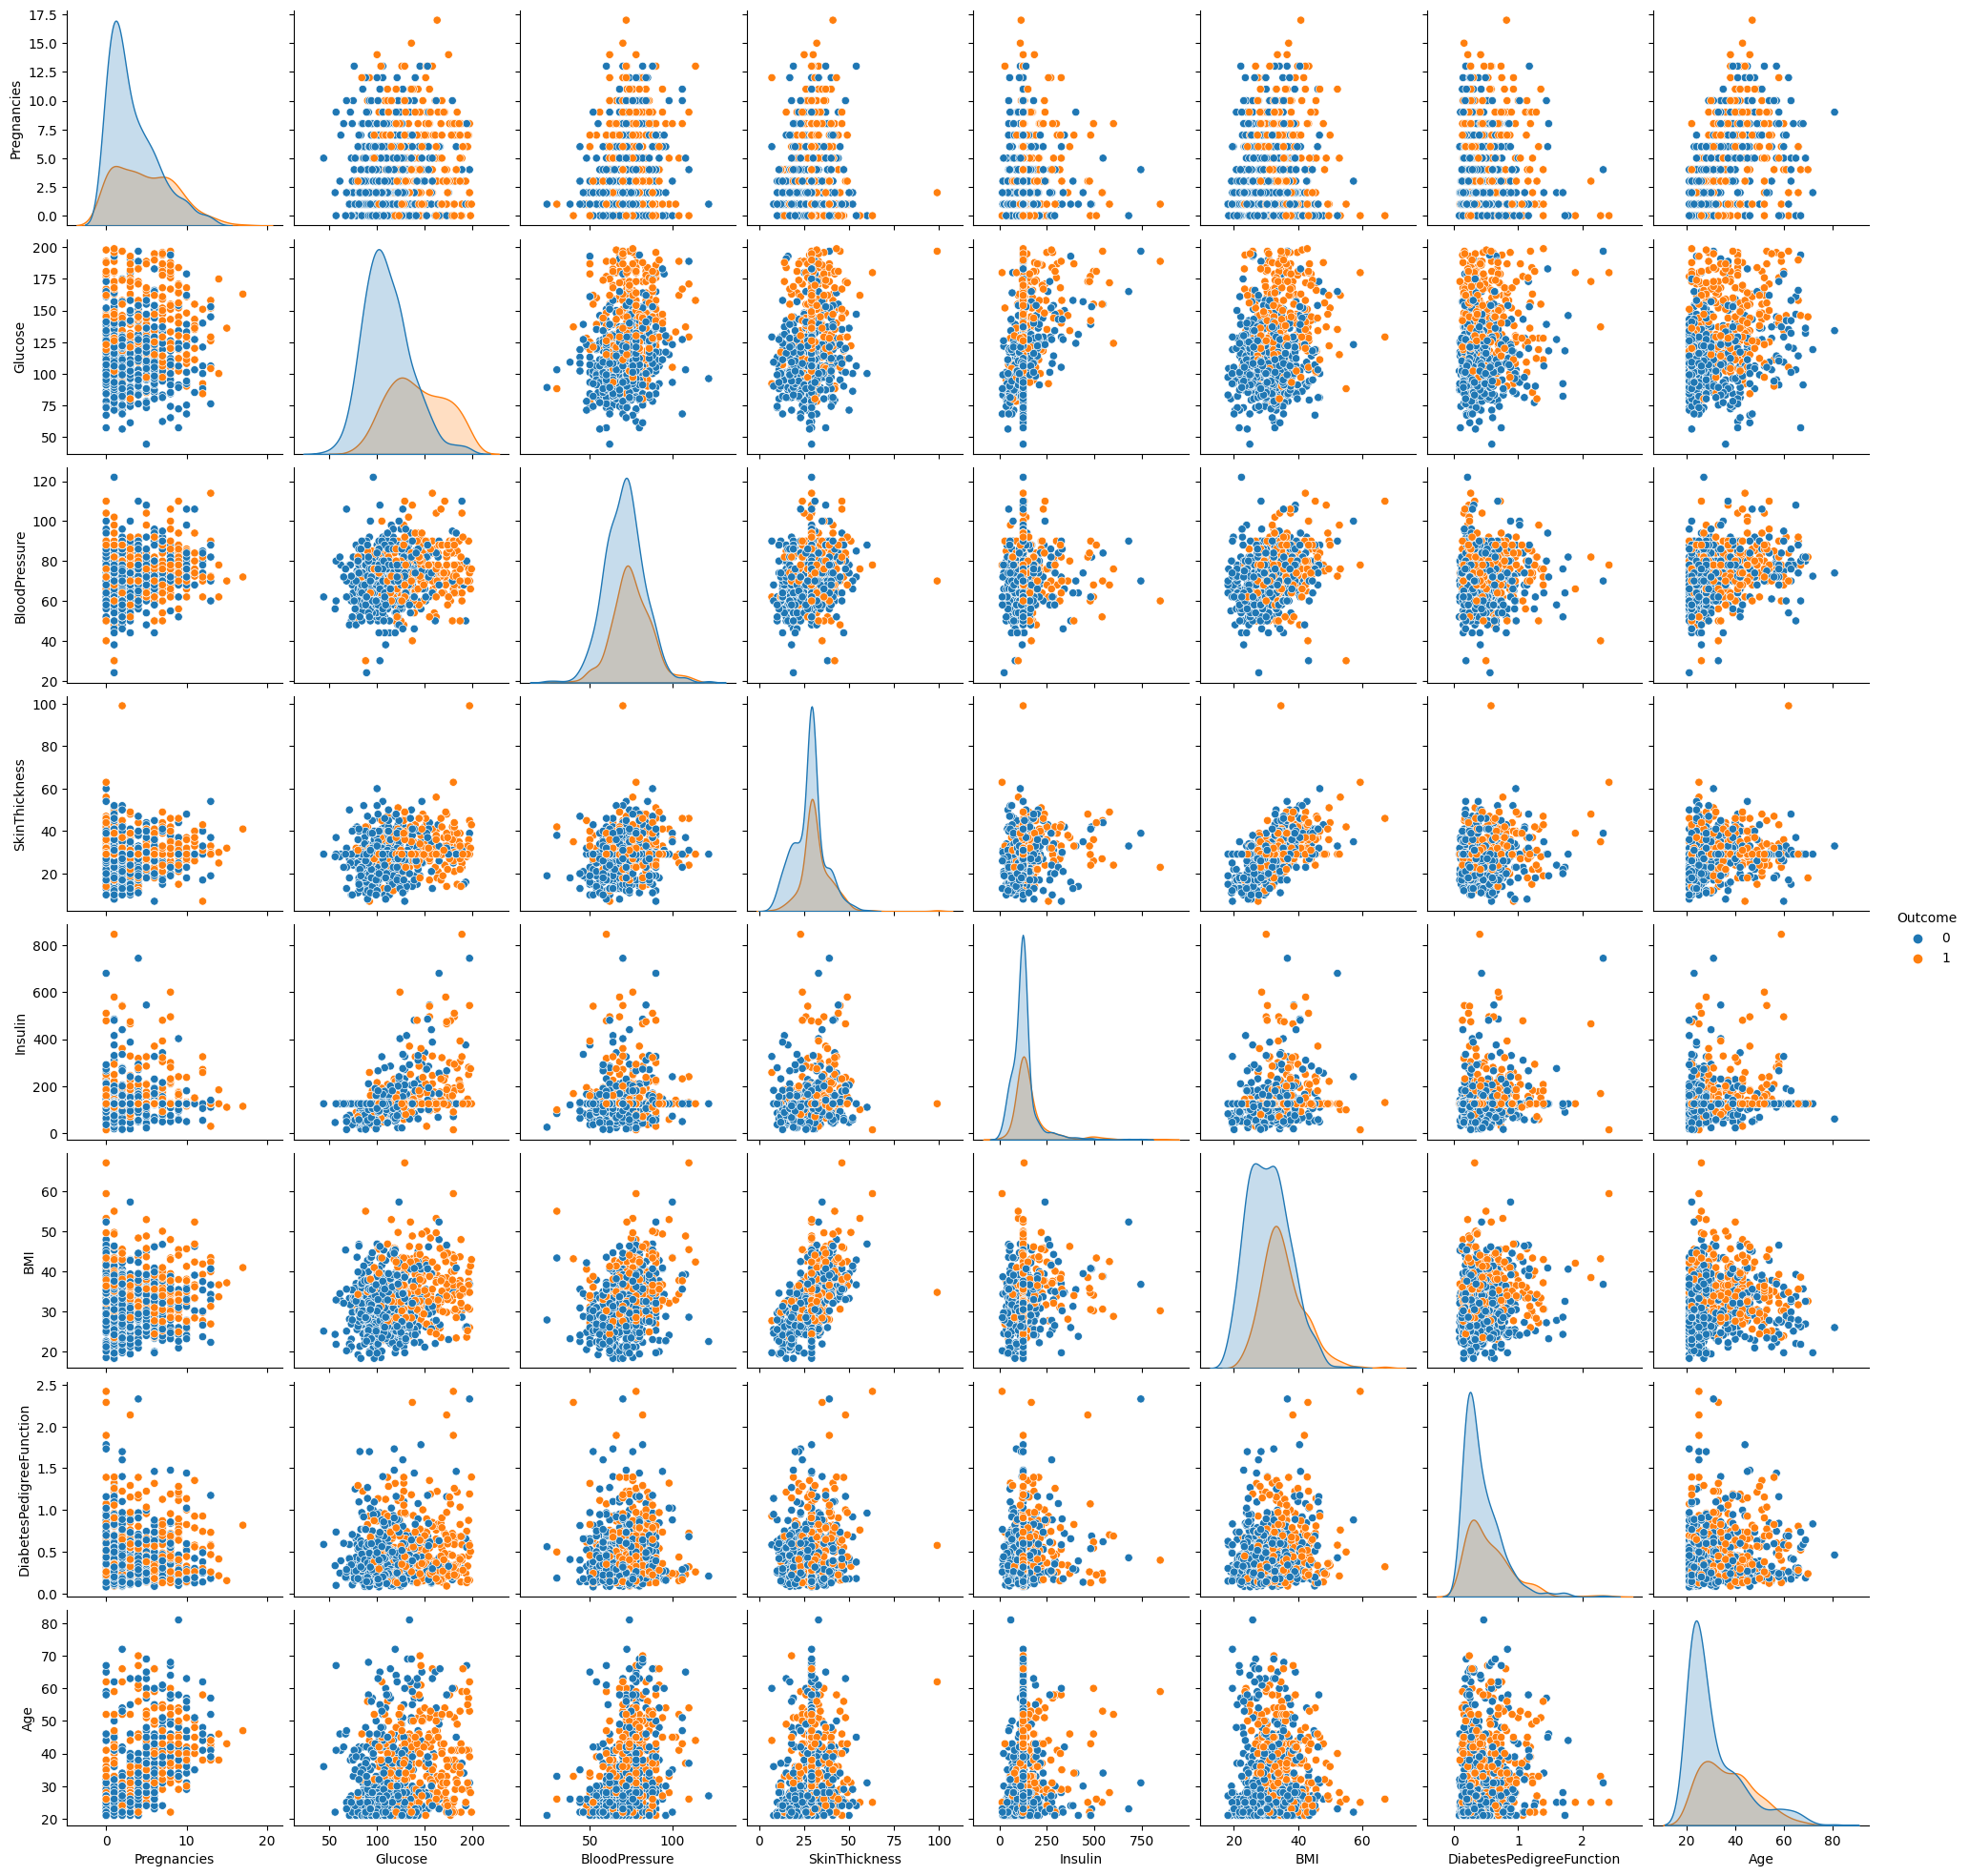

In [27]:
sns.pairplot(data,hue='Outcome')

In [28]:
from scipy.stats import iqr

In [29]:
glucose_iqr_diabetes_n = iqr(data[(data['Outcome']==0) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

glucose_iqr_diabetes_y = iqr(data[(data['Outcome']==1) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

In [30]:
print ("intercuantil para glucosas sin diabetes {} y con diabates {}".format(glucose_iqr_diabetes_n,glucose_iqr_diabetes_y))

intercuantil para glucosas sin diabetes 32.0 y con diabates 48.0


In [31]:
Insulin_iqr_diabetes_n = iqr(data[(data['Outcome']==0) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

Insulin_iqr_diabetes_y = iqr(data[(data['Outcome']==1) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

In [32]:
print ("intercuantil para valores de insulina sin diabetes {} y con diabates {}".format(Insulin_iqr_diabetes_n,Insulin_iqr_diabetes_y))

intercuantil para valores de insulina sin diabetes 30.0 y con diabates 42.25


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

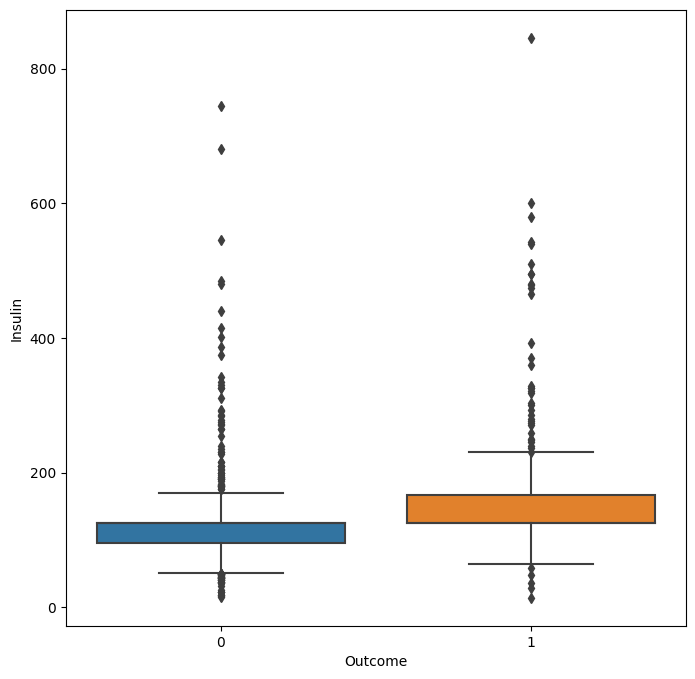

In [33]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='Insulin',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

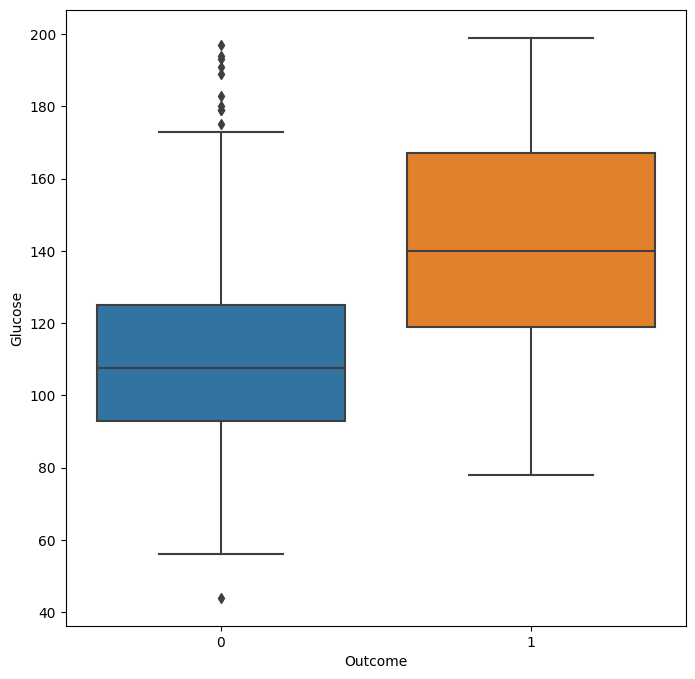

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='Glucose',data=data)

In [35]:
def Glucose_category(glucose):

    if glucose < 120:
        return 1
    else:
        return 2
   

In [36]:
def BloodPressure_category(blood):

    if blood < 62:
        return 1
    elif blood < 80:
        return 2
    elif blood >= 80:
        return 3

In [37]:
data['Glucose_category']  = data["Glucose"].apply(Glucose_category)

In [38]:
data['BloodPressure_category']  = data["BloodPressure"].apply(BloodPressure_category)

In [39]:
my_tab = pd.crosstab(data["Glucose_category"],  # Make a crosstab
                     data.Outcome,
                     margins=True, 
                     margins_name="Total")    

In [40]:
my_tab_2 = pd.crosstab(data["BloodPressure_category"],  # Make a crosstab
                     data.Outcome,
                     margins=True, 
                     margins_name="Total")    

In [41]:
my_tab_2

Outcome                   0    1  Total
BloodPressure_category                 
1                       101   23    124
2                       284  155    439
3                       115   90    205
Total                   500  268    768

In [42]:
my_tab

Outcome             0    1  Total
Glucose_category                 
1                 335   68    403
2                 165  200    365
Total             500  268    768

In [43]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Glucose_category              int64
BloodPressure_category        int64
dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Glucose_category          768 non-null    int64  
 10  BloodPressure_category    768 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.1 KB


In [45]:
data.duplicated().sum()

0

## EDA

### Correlation

<AxesSubplot:>

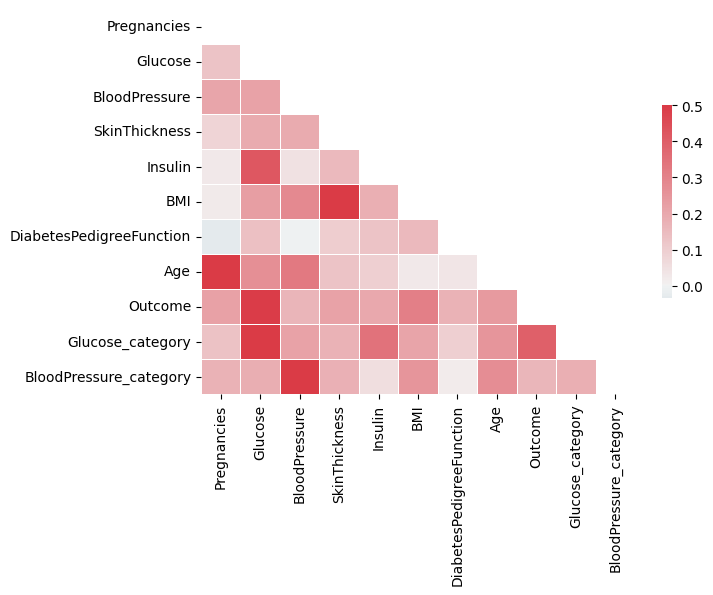

In [46]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
lis=["don't have diabetes","have diabetes"]
have_or_not = data["Outcome"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]
fig = px.pie(values=data['Outcome'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between have diabetes or not")
fig.show()

In [48]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [49]:
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [50]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700) 
fig.show()

In [51]:
#data.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
#plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

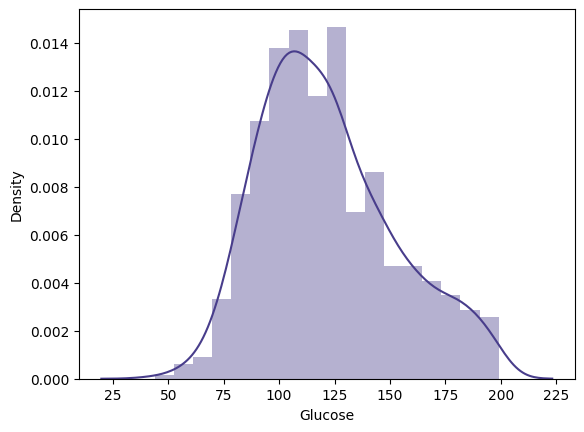

In [52]:
sns.distplot(data['Glucose'],color ="DarkSlateBlue" )

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

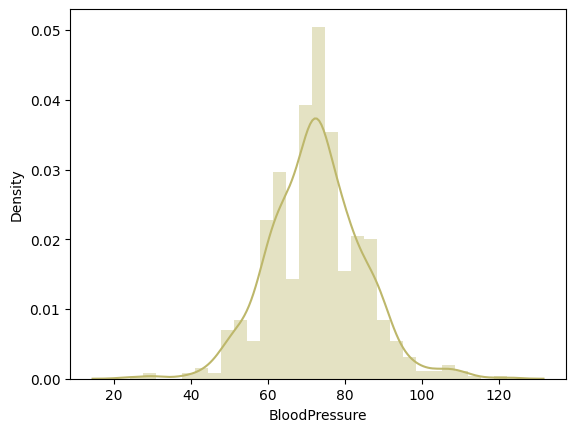

In [53]:
sns.distplot(data['BloodPressure'], color = 'DarkKhaki')

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

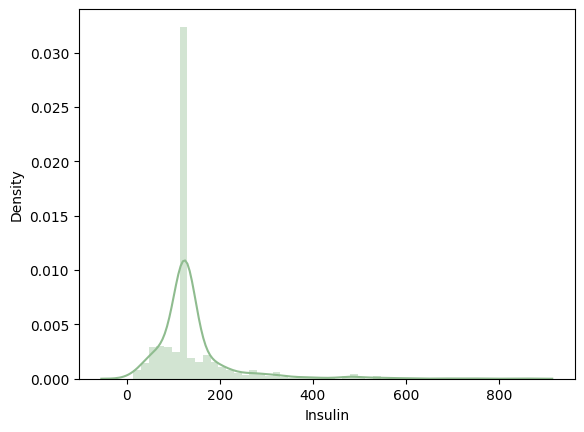

In [54]:
sns.distplot(data['Insulin'],color ="DarkSeaGreen" )

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

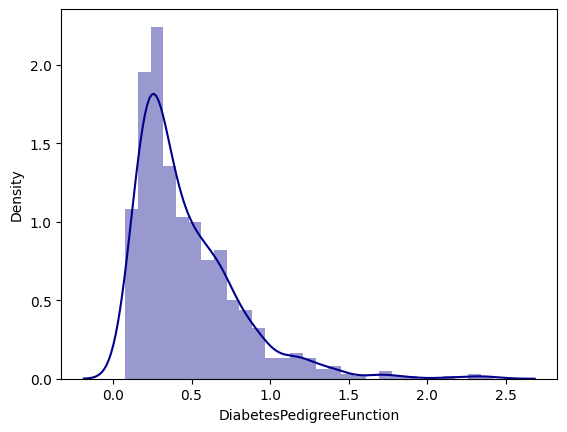

In [55]:
sns.distplot(data['DiabetesPedigreeFunction'],color ="DarkBlue" )

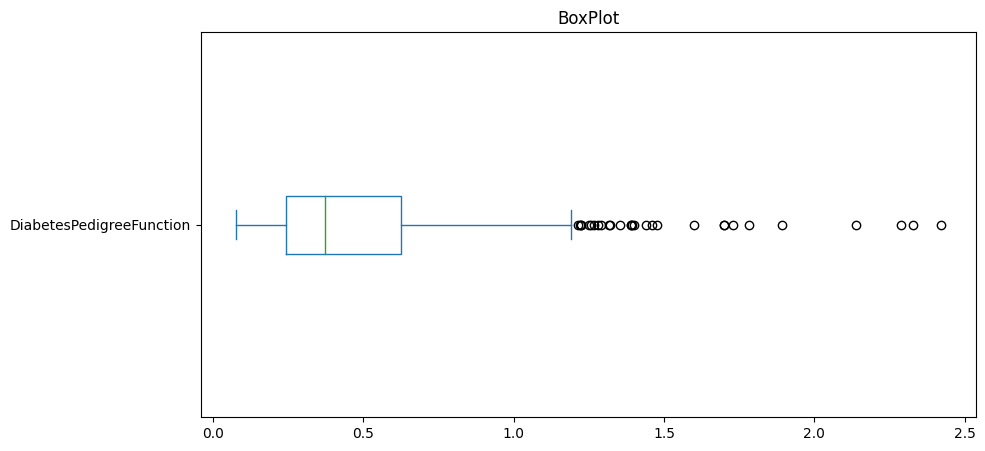

In [56]:
ax = data.DiabetesPedigreeFunction.plot(kind='box', figsize = (10,5),
                                       title='BoxPlot',
                                       vert=False)

In [57]:
IQR = np.percentile(data.DiabetesPedigreeFunction, 75) - np.percentile(data.DiabetesPedigreeFunction, 25)

upper = np.where(data.DiabetesPedigreeFunction >= (np.percentile(data.DiabetesPedigreeFunction, 75) + 1.5 * IQR))
lower = np.where(data.DiabetesPedigreeFunction <= (np.percentile(data.DiabetesPedigreeFunction, 25) - 1.5 * IQR))
 
data.drop(upper[0], inplace=True)
data.drop(lower[0], inplace=True)

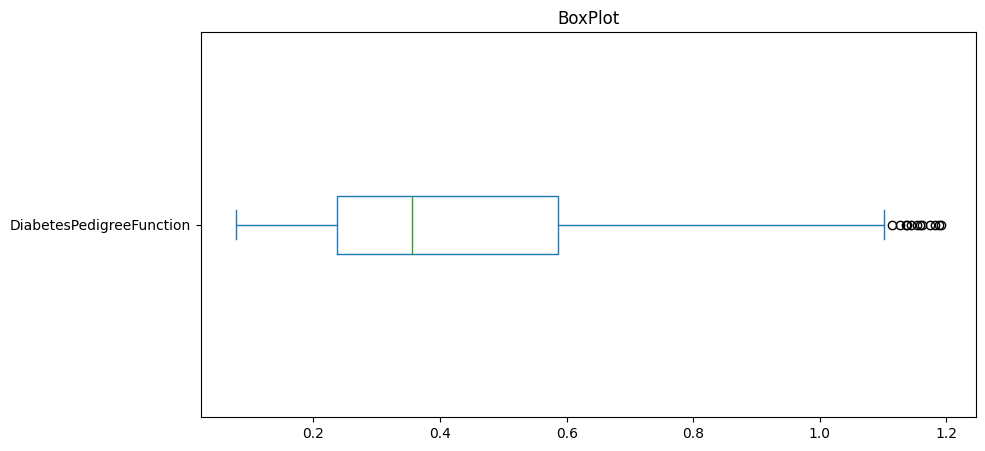

In [58]:
ax = data.DiabetesPedigreeFunction.plot(kind='box', figsize = (10,5),
                                       title='BoxPlot',
                                       vert=False)

### Split Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x = data.drop(['Outcome'] , axis = 1).values
y = data['Outcome' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

### Scale data

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(x_train)

MinMaxScaler()

In [70]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
r, c = x_train.shape
r2 ,c2 = x_test.shape
print (f"x_train = {r} and y_train = {y_train.shape} ")
print (f"x_test = {r2} and y_test = {y_test.shape} ")

x_train = 591 and y_train = (591,) 
x_test = 148 and y_test = (148,) 


### Create Model

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [73]:
model = Sequential()

In [74]:

model.add(Dense(20,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [75]:
model.fit(x_train, y_train,batch_size=10,epochs=200)

Epoch 1/200
60/60 [==============================] - 0s 989us/step - loss: 0.6631 - accuracy: 0.6379
Epoch 2/200
60/60 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.6447
Epoch 3/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.6988
Epoch 4/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7293
Epoch 5/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.7428
Epoch 6/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7428
Epoch 7/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7377
Epoch 8/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7496
Epoch 9/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7445
Epoch 10/200
60/60 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7411
Epoch 1

60/60 [==============================] - 0s 874us/step - loss: 0.4002 - accuracy: 0.8054
Epoch 83/200
60/60 [==============================] - 0s 867us/step - loss: 0.4012 - accuracy: 0.8122
Epoch 84/200
60/60 [==============================] - 0s 812us/step - loss: 0.4003 - accuracy: 0.8054
Epoch 85/200
60/60 [==============================] - 0s 946us/step - loss: 0.4040 - accuracy: 0.8071
Epoch 86/200
60/60 [==============================] - 0s 840us/step - loss: 0.4050 - accuracy: 0.8054
Epoch 87/200
60/60 [==============================] - 0s 875us/step - loss: 0.3977 - accuracy: 0.8071
Epoch 88/200
60/60 [==============================] - 0s 804us/step - loss: 0.3999 - accuracy: 0.8122
Epoch 89/200
60/60 [==============================] - 0s 804us/step - loss: 0.4058 - accuracy: 0.8020
Epoch 90/200
60/60 [==============================] - 0s 765us/step - loss: 0.4005 - accuracy: 0.8122
Epoch 91/200
60/60 [==============================] - 0s 756us/step - loss: 0.3995 - accuracy: 

60/60 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8274
Epoch 163/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8190
Epoch 164/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8223
Epoch 165/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8240
Epoch 166/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8393
Epoch 167/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8274
Epoch 168/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8325
Epoch 169/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8291
Epoch 170/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8342
Epoch 171/200
60/60 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8325
Epoc

<AxesSubplot:>

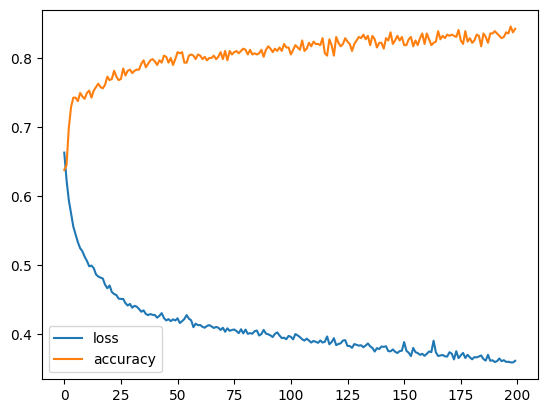

In [76]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [78]:
prediction = model.predict(x_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] 


In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       104
           1       0.65      0.77      0.71        44

    accuracy                           0.81       148
   macro avg       0.77      0.80      0.78       148
weighted avg       0.82      0.81      0.81       148



In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
mean_abs_error=mean_absolute_error(prediction,y_test)
mean_abs_error

0.1891891891891892

In [82]:
np.sqrt(mean_squared_error(y_test,prediction))

0.43495883620084

In [83]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8108


[0.4359569549560547, 0.8108108043670654]